In [1]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML



%matplotlib inline

In [2]:
G = nx.read_gml("./../data_desafio/GraphMissingEdges.gml")

In [3]:
categories_nodes = nx.get_node_attributes(G,'categories')
for key in categories_nodes:
    categories_nodes[key] = categories_nodes[key].split(',')

In [4]:
categories_df = pd.read_csv('./../data_desafio/categories.csv', sep=',')
categories_df = categories_df.set_index('CategoryId')

In [5]:
for node in G.nodes:
    categories = categories_nodes[node]
    categories_names = []
    for category in categories:
        if category != '':
            categories_names.append(categories_df.loc[int(category)]['names'])
    G.nodes[node]['categories_named'] = categories_names

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Número de nós : 4575
Número de arestas : 18991
Número de componentes conectados : 756


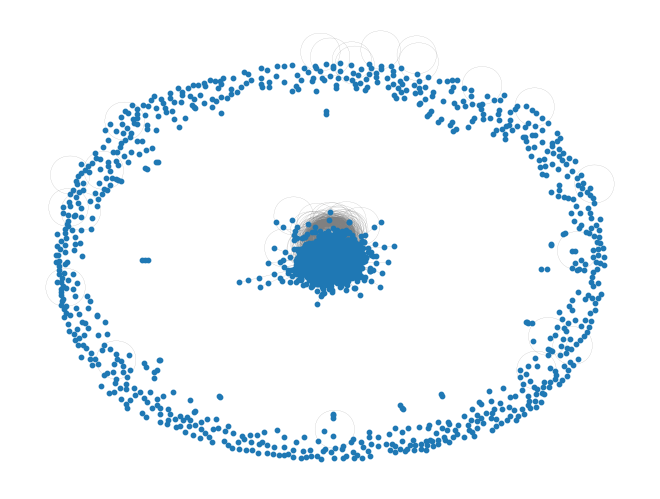

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('rainbow'), pos=pos, node_size=10, with_labels=False, edge_color='grey', width=0.1)

n = G.number_of_nodes()
m = G.number_of_edges()
print("Número de nós : %d" % n)
print("Número de arestas : %d" % m)
print("Número de componentes conectados : %d" % nx.number_connected_components(G))

In [7]:
# Remove 20% das arestas
proportion_edges = 0.2
edge_subset = random.sample(sorted(G.edges()), int(proportion_edges * G.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

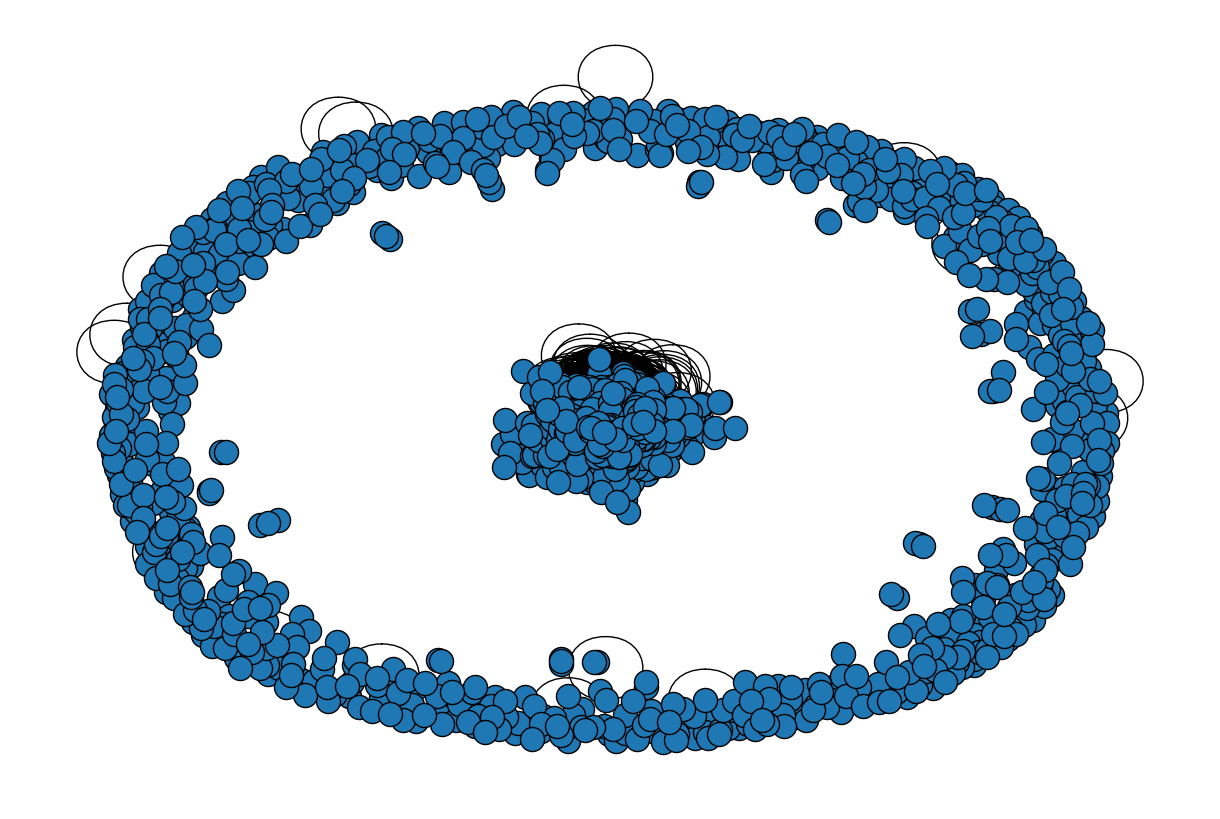

In [8]:
plt.figure(figsize=(12,8))
nx.draw(G_train)
plt.gca().collections[0].set_edgecolor("#000000") 

In [9]:
edge_subset_size = len(list(edge_subset))
print("Número de arestas removidas : %d" % edge_subset_size)
print("Número de arestas restantes : %d" % (m - edge_subset_size))

Número de arestas removidas : 3798
Número de arestas restantes : 15193


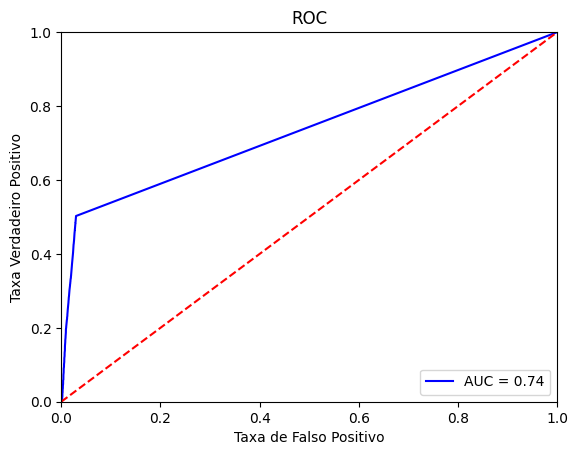

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Fazendo previsões com o jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_train))

score_jaccard = [s for (u,v,s) in pred_jaccard]
label_jaccard = [(u,v) in edge_subset for (u,v,s) in pred_jaccard]


# Computa o AUC score da curva ROC
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_jaccard, tpr_jaccard, 'b', label = 'AUC = %0.2f' % auc_jaccard)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()